# Libraries to Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sympy import *
%matplotlib inline

# Traffic Shockwaves

**[Link to the Shockwave Problem](https://en.wikibooks.org/wiki/Fundamentals_of_Transportation/Shockwaves/Solution)**

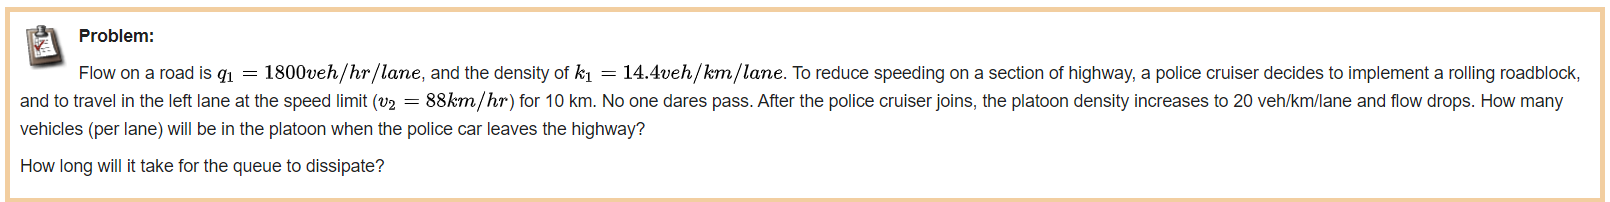

In [2]:
q1 = 1800 #veh/hr
k1 = 14.4
v1 = q1/k1
print(f'velocity v: {v1} km/hr')

velocity v: 125.0 km/hr


In [3]:
k2 = 20
v2 = 88
q2 = k2*v2
print(f'q2: {q2} veh/hr')

q2: 1760 veh/hr


In [4]:
wab = (q2-q1)/(k2-k1)
print(f'Shockwave speed: {wab} km/hr')

Shockwave speed: -7.142857142857143 km/hr


In [5]:
#find the critical density which is the density when the traffic flow is at maximum
x = symbols('x')
y1 = v1*x
y2 = -v2*(x-k2)+q2
eq = y1-y2
k_crit = solve(eq,x)[0]
print(f'Critical density: {k_crit} veh/km')

qmax = k_crit*v1
print(f'Maximum traffic flow: {qmax} veh/hr')

Critical density: 16.5258215962441 veh/km
Maximum traffic flow: 2065.72769953052 veh/hr


In [6]:
125*17

2125

In [7]:
x = symbols('x')
k_jam = solve(y2,x)[0]
print(f'Jam density is {k_jam} veh/km')

Jam density is 40 veh/km


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


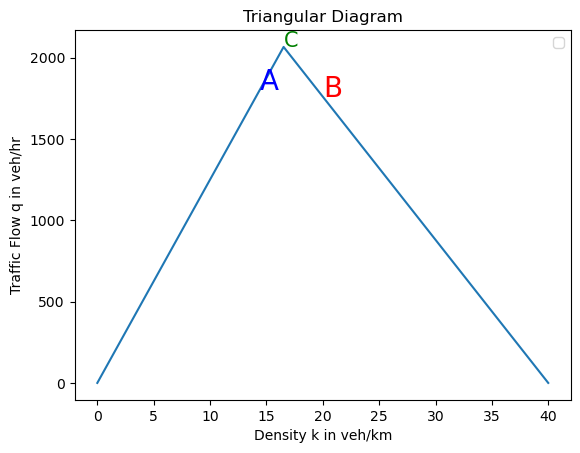

In [8]:
x = [0,k1,k_crit,k_jam]
y = [0,q1,qmax,0]
plt.plot(x,y)
plt.xlabel('Density k in veh/km')
plt.ylabel('Traffic Flow q in veh/hr')
plt.title('Triangular Diagram')
crit_den = [k_crit]
max_flow = [qmax]
plt.text(k1,q1,'A',size=20,color='blue')
plt.text(k2,q2,'B',size=20,color='red')
plt.text(k_crit,qmax,'C',size=15,color='green')
plt.legend()

In [9]:
length = 10 #km
time = round(length/v2,2)
print(f'Police time: {time} hours')

Police time: 0.11 hours


In [10]:
wbc = (q2-qmax)/(k2-k_crit)
print(f'Recovery shockwave: {wbc} km/hr')

Recovery shockwave: -88.0000000000000 km/hr


In [11]:
queue_length = abs(wab*time)
print(f'Queue length: {queue_length} km.')

Queue length: 0.7857142857142858 km.


## How long will the queue last?

In [12]:
t = symbols('t')

eliminated = queue_length + (wbc-wab)*t
time_dis = solve(eliminated,t)[0]
print(f'It will take {round(time_dis,3)} hours for the queue to dissipate.')
print(f'It will take {round(time_dis*60,3)} minutes for the queue to dissipate.')
print(f'It will take {round(time_dis*3600,3)} seconds for the queue to dissipate.')

It will take 0.01 hours for the queue to dissipate.
It will take 0.583 minutes for the queue to dissipate.
It will take 34.982 seconds for the queue to dissipate.


## Number of vehicles in the platoon

In [13]:
plat = np.ceil((v2-wab)*time*k2)
print(f'There were {plat} vehicles in the platoon')

There were 210.0 vehicles in the platoon
